In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


### import the necessary Libraries


In [89]:
#import the necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import KFold # import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import dataset

In [90]:
df = pd.read_csv("/kaggle/input/road-traffic-accidents/RTA Dataset.csv")

In [91]:
for c in df.columns:
    print(c, df[c].unique()[:3])

Time ['17:02:00' '1:06:00' '14:15:00']
Day_of_week ['Monday' 'Sunday' 'Friday']
Age_band_of_driver ['18-30' '31-50' 'Under 18']
Sex_of_driver ['Male' 'Female' 'Unknown']
Educational_level ['Above high school' 'Junior high school' nan]
Vehicle_driver_relation ['Employee' 'Unknown' 'Owner']
Driving_experience ['1-2yr' 'Above 10yr' '5-10yr']
Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)']
Owner_of_vehicle ['Owner' 'Governmental' nan]
Service_year_of_vehicle ['Above 10yr' '5-10yrs' nan]
Defect_of_vehicle ['No defect' nan '7']
Area_accident_occured ['Residential areas' 'Office areas' '  Recreational areas']
Lanes_or_Medians [nan 'Undivided Two way' 'other']
Road_allignment ['Tangent road with flat terrain' nan
 'Tangent road with mild grade and flat terrain']
Types_of_Junction ['No junction' 'Y Shape' 'Crossing']
Road_surface_type ['Asphalt roads' 'Earth roads' nan]
Road_surface_conditions ['Dry' 'Wet or damp' 'Snow']
Light_conditions ['Daylight' 'Darkness - lights li

### convert the 'Date' column to datetime format


In [92]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [93]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

### Adding groupby

In [94]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

## Data Preprocessing

In [95]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### Numerical data analysis

#### Bar plot

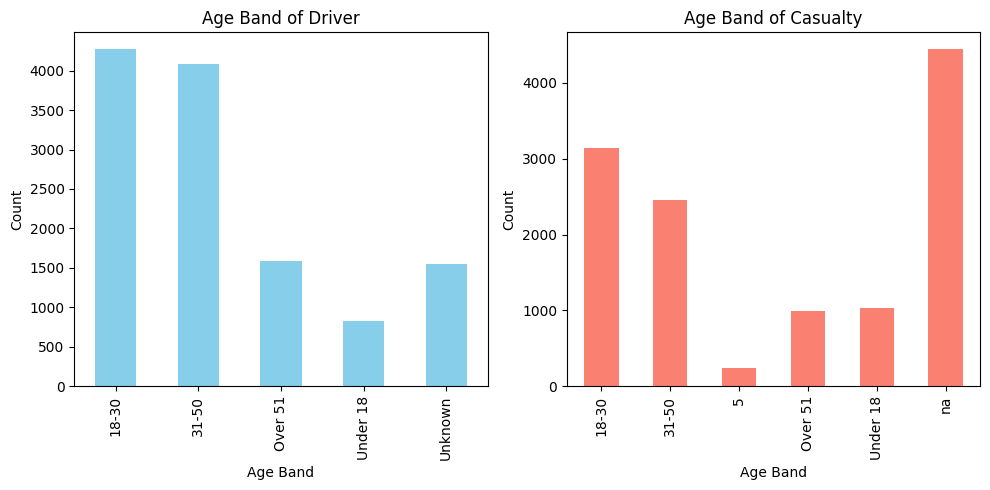

In [96]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

#Age_band_of_casualty

plt.subplot(1, 2, 2)
df['Age_band_of_casualty'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Age Band of Casualty')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Histogram

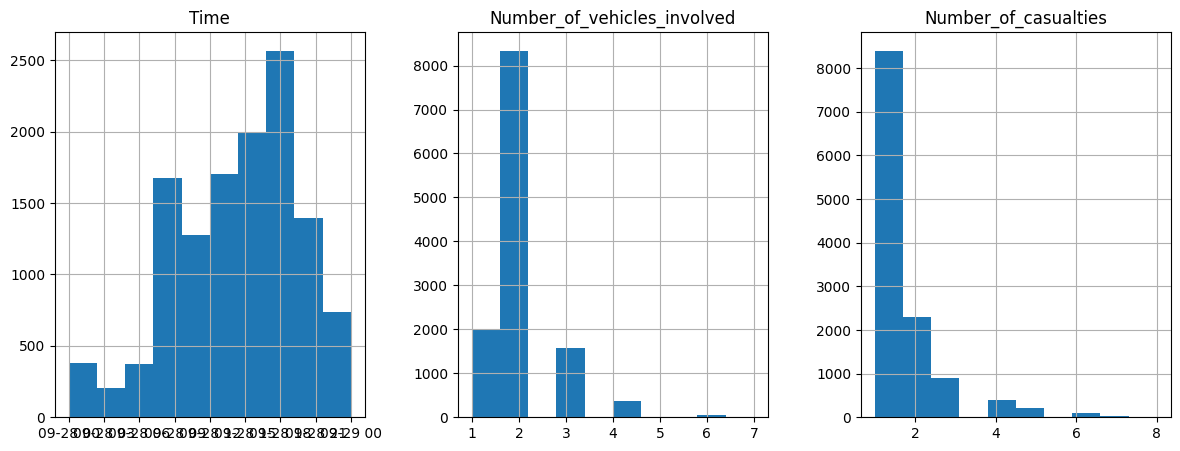

In [97]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [98]:
df['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

#### Boxplot

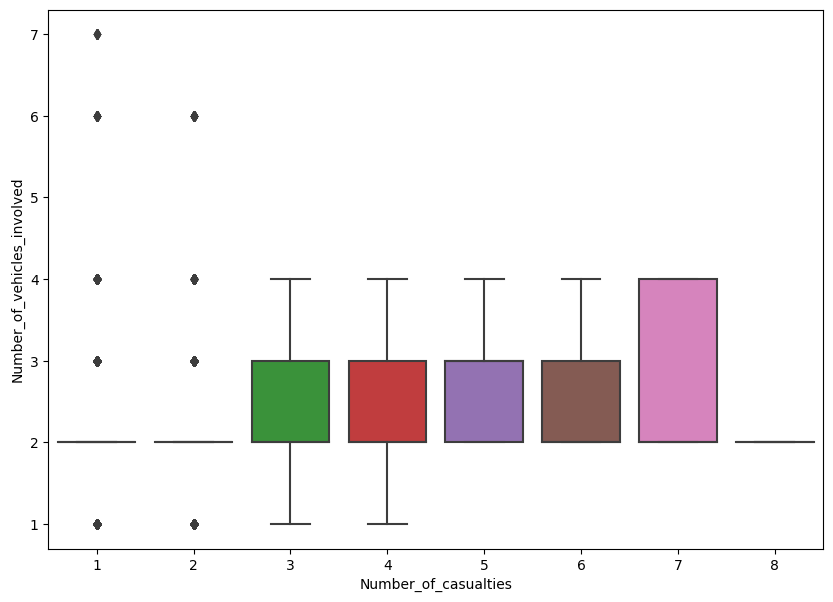

In [99]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

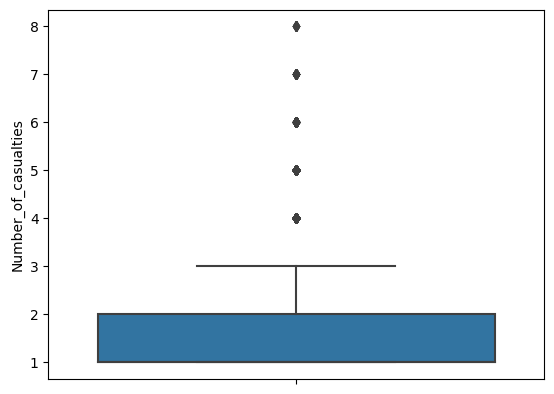

In [100]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

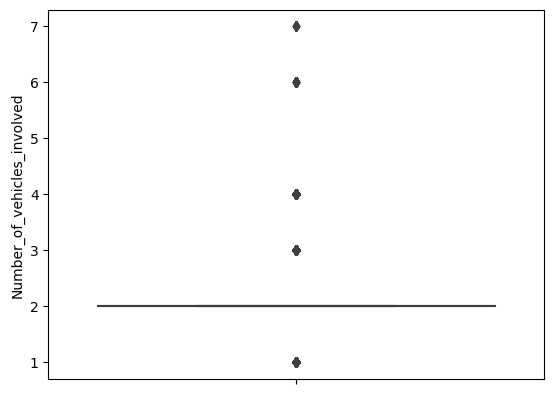

In [101]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [102]:
df['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

#### Scatterplot

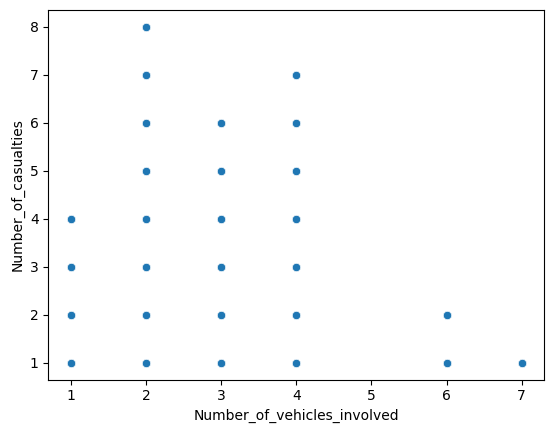

In [103]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

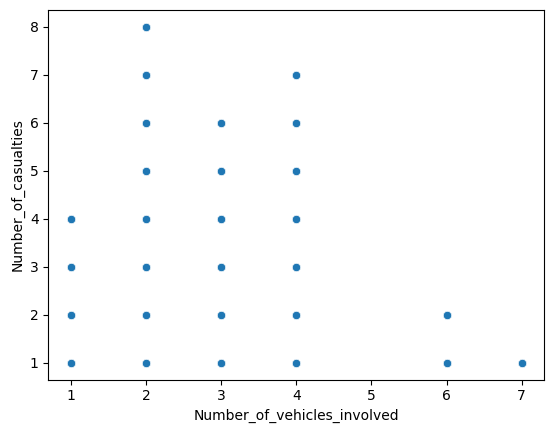

In [104]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

#### Correlation

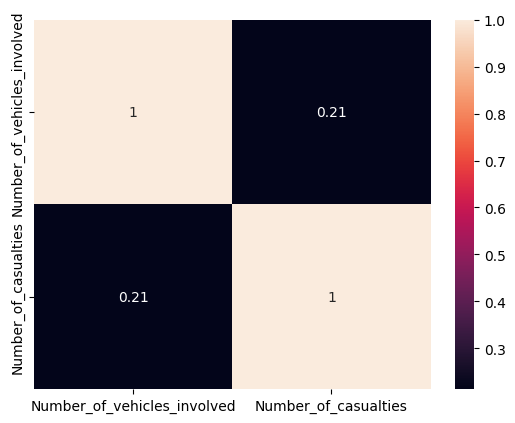

In [105]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Categorical data analysis

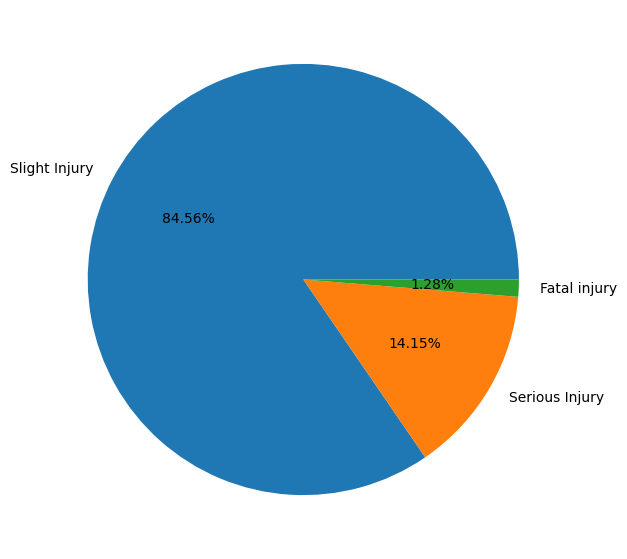

In [106]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

### creating a facet grid with columns as survived=0 and survived=1


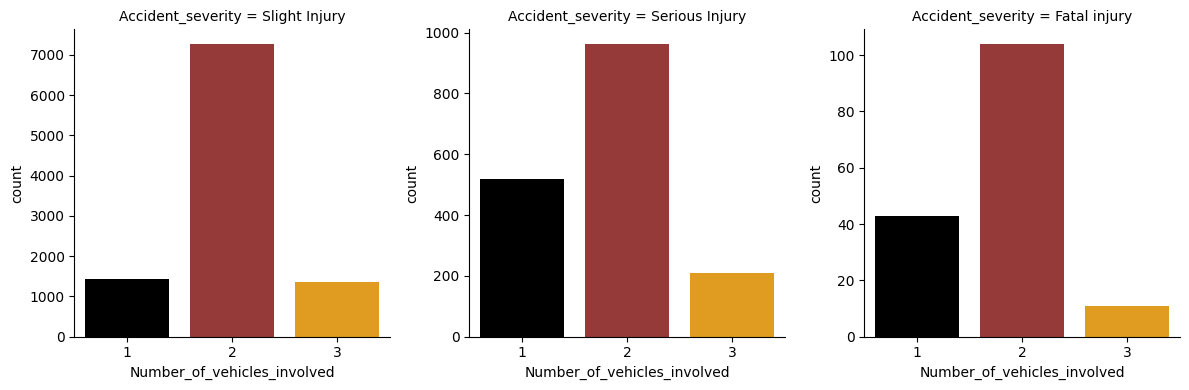

In [107]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

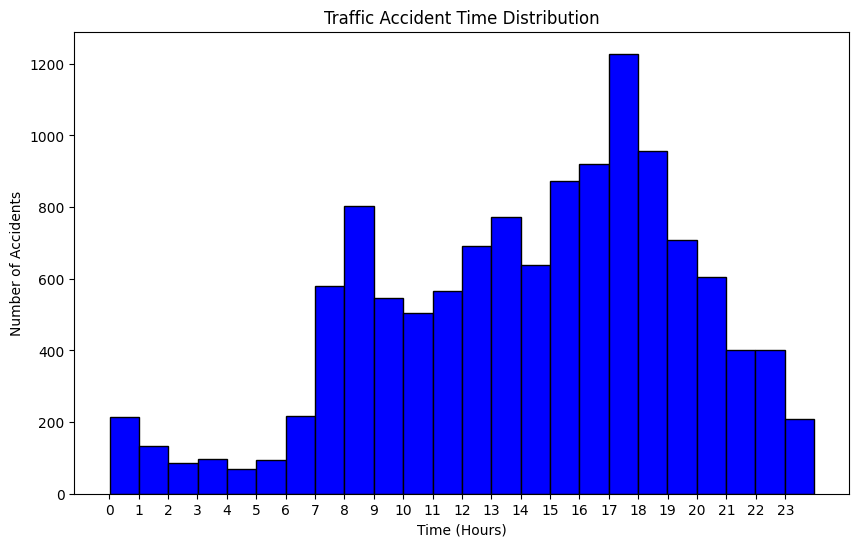

In [108]:
df['TimeInSeconds'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

plt.figure(figsize=(10,6))
plt.hist(df['TimeInSeconds'], bins=24, color='blue', edgecolor='black')
plt.title('Traffic Accident Time Distribution')
plt.xlabel('Time (Hours)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24 * 3600, 3600), range(24))
plt.show()

In [109]:
# dropping columns that can cause imbalance while imputation
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [110]:
df.shape

(12316, 20)

In [111]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'TimeInSeconds'],
      dtype='object')

### Filling missing values

In [112]:
# fill missing values with mean column values
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [113]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
TimeInSeconds                  0
dtype: int64

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


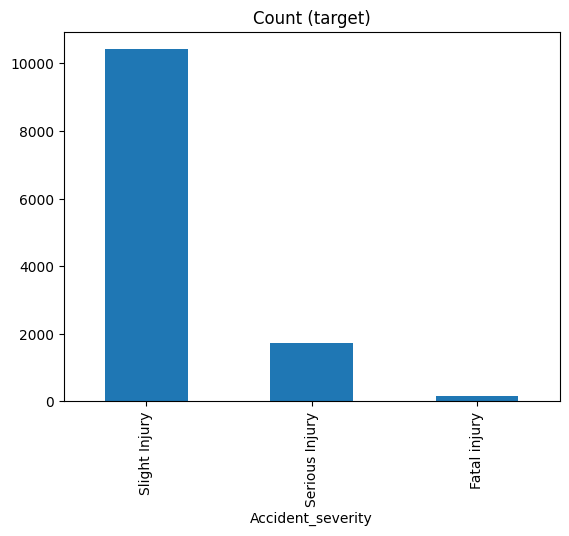

In [114]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)                            #categorical values to integers

<Axes: >

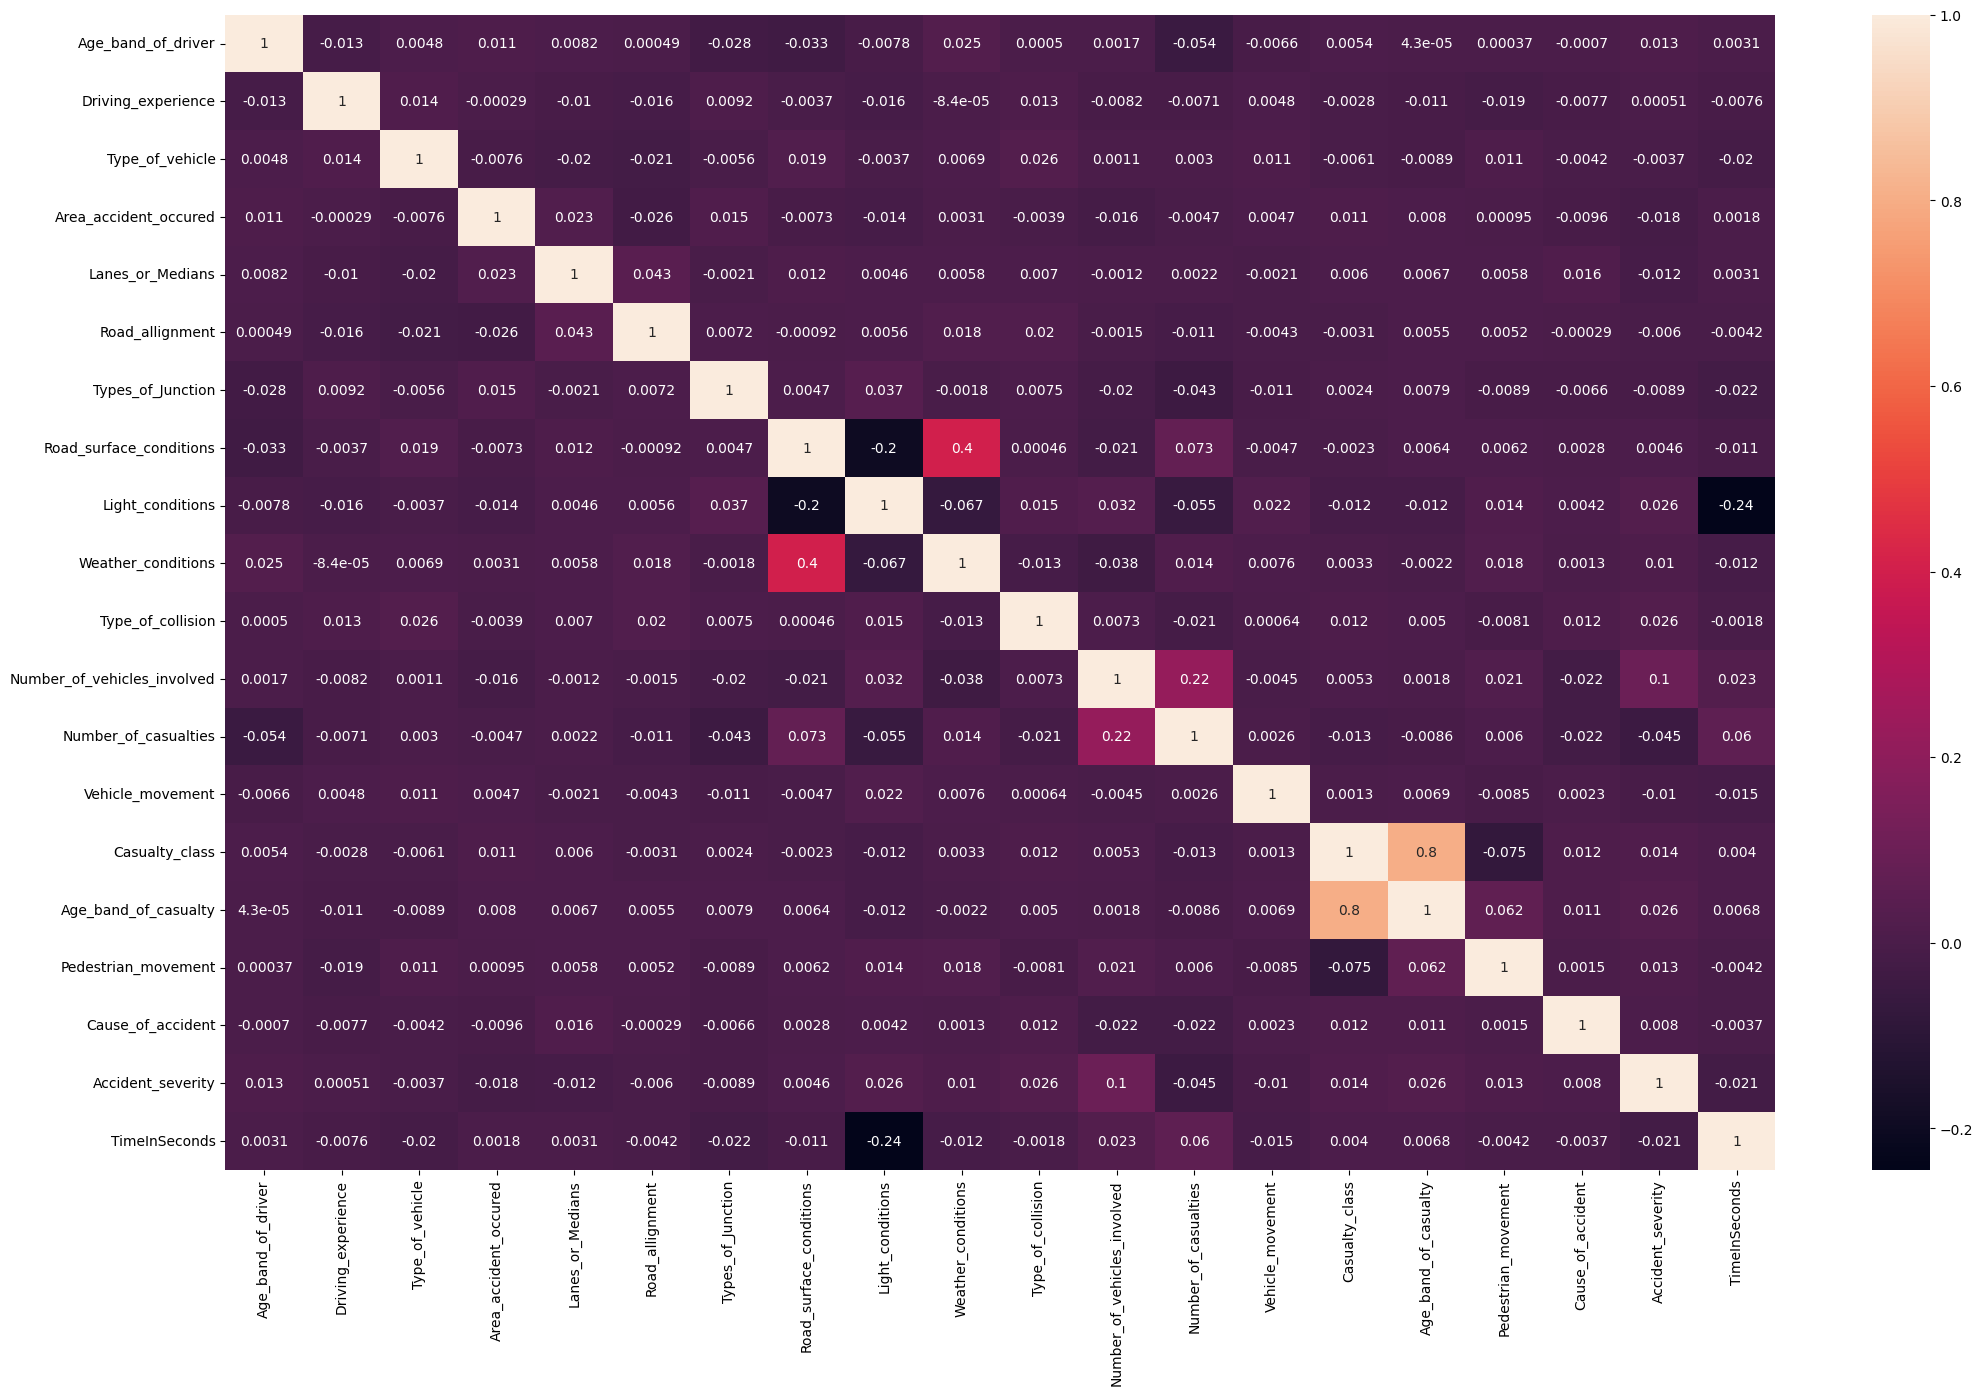

In [116]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [117]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

### spliting data


In [118]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 19) (3695, 19) (8621,) (3695,)


### upsampling 


In [119]:

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 19) (21972,)


In [120]:
# Feature Scaling 
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
# X_test = scaler.transform(X_test) 

### Create and fit the Logistic Regression model


In [121]:
# Create and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(xtrain, ytrain)

# Make predictions
y_pred = model.predict(xtest)


In [122]:
# Evaluate the model
print("Classification Report:")
print(classification_report(ytest, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.58      0.08        52
           1       0.18      0.30      0.22       552
           2       0.86      0.56      0.68      3091

    accuracy                           0.53      3695
   macro avg       0.36      0.48      0.33      3695
weighted avg       0.75      0.53      0.60      3695

Confusion Matrix:
[[  30   10   12]
 [ 114  165  273]
 [ 597  749 1745]]


In [123]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE and R² Score
logmse = mean_squared_error(ytest, y_pred)
logr2 = r2_score(ytest, y_pred)

print(f"Mean Squared Error: {logmse:.2f}")
print(f"R² Score: {logr2:.2f}")

Mean Squared Error: 0.97
R² Score: -4.57


### HuberRegression

In [124]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()
huber.fit(xtrain, ytrain)

# Make predictions
y_pred = huber.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [125]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.72
R² Score: -3.16


### RandomForestRegression

In [126]:
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification tasks
Randomf = RandomForestRegressor(n_estimators=100, random_state=42)  # Use RandomForestClassifier for classification
Randomf.fit(xtrain, ytrain)

# Make predictions
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.97
R² Score: -4.57


## Observation

- Better prediction model is Logisticreggression
